In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

Khai báo các thư viện cần dùng

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Pandas version 1.1.4
Matplotlib version 3.2.2


Version Python, Pandas, Matplotlib

In [3]:
# The inital set of baby names
names = ['Bob','Jessica','Mary','John','Mel']

In [4]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

random.seed?

In [33]:
random.randint?

In [6]:
len?

In [8]:
range?

In [9]:
zip?

In [10]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print first 10 records
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

In [11]:
# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

Tạo một số ngẫu nhiên từ 0 đến 1000

In [12]:
BabyDataSet = list(zip(random_names,births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

Hợp nhất tên và tập dữ liệu sinh bằng hàm zip.

In [13]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


Bây giờ chúng ta sẽ sử dụng thư viện pandas để xuất tập dữ liệu này thành tệp csv

In [14]:
df.to_csv?

Xuất khung dữ liệu sang tệp văn bản. Chúng ta có thể đặt tên tệp là Birth1880.txt. Hàm to_csv sẽ được sử dụng để xuất. Tệp sẽ được lưu ở cùng một vị trí của sổ ghi chép trừ khi được chỉ định khác.

In [15]:
df.to_csv('births1880.txt',index=False,header=False)

Các tham số duy nhất chúng ta sẽ sử dụng là chỉ mục và tiêu đề. Đặt các tham số này thành False sẽ ngăn không cho xuất tên chỉ mục và tiêu đề. Thay đổi giá trị của các tham số này để hiểu rõ hơn về việc sử dụng chúng.

In [16]:
pd.read_csv?


Để kéo tệp văn bản vào, chúng ta sẽ sử dụng hàm pandas read_csv

In [18]:
Location = r'/content/births1880.txt'
df = pd.read_csv(Location)

Location = '/content/births1880.txt'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    999 non-null    object
 1   968     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Chú ý đến r trước chuỗi. Vì các dấu gạch chéo là các ký tự đặc biệt, tiền tố của chuỗi bằng một r sẽ thoát khỏi toàn bộ chuỗi.

In [20]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [21]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


chúng ta sẽ chuyển tham số header cho hàm read_csv và đặt nó thành Không (có nghĩa là null trong python).

In [22]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


In [23]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


Nếu chúng ta muốn đặt tên cụ thể cho các cột, chúng ta sẽ phải chuyển một tham số khác được gọi là tên. Chúng ta cũng có thể bỏ qua tham số tiêu đề.

In [24]:
import os
os.remove(Location)

Delete the txt file 

In [25]:
# Method 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

Chúng ta có thể sử dụng thuộc tính duy nhất của khung dữ liệu để tìm tất cả các bản ghi duy nhất của cột "Name".

In [26]:
# If you actually want to print the unique values:
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [27]:
# Method 2:
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


Vì chúng tôi có nhiều giá trị cho mỗi tên con, chúng tôi cần tổng hợp dữ liệu này để chúng tôi chỉ có một tên con xuất hiện một lần. Điều này có nghĩa là 1.000 hàng sẽ cần trở thành 5. Chúng ta có thể thực hiện điều này bằng cách sử dụng hàm groupby.

In [28]:
df.groupby?

In [29]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


In [30]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


Để tìm tên phổ biến nhất hoặc tên trẻ có tỷ lệ sinh cao nhất, chúng ta có thể thực hiện một trong các thao tác sau.

Sắp xếp khung dữ liệu và chọn hàng trên cùng
Sử dụng thuộc tính max () để tìm giá trị lớn nhất

In [31]:
# Method 2:
df['Births'].max()

106817

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


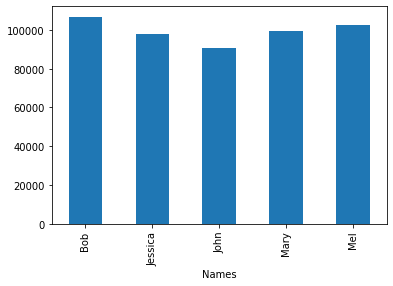

In [32]:
# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)

Tại đây chúng ta có thể vẽ biểu đồ cột Sinh và gắn nhãn biểu đồ để hiển thị cho người dùng cuối điểm cao nhất trên biểu đồ. Kết hợp với bảng, người dùng cuối có một bức tranh rõ ràng rằng Bob là tên em bé phổ biến nhất trong tập dữ liệu.